<a href="https://colab.research.google.com/github/gonzalovaldenebro/Solar_Pannel_Dust_Classification/blob/main/Solar_pannel_dust_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Gonzalo Valdenebro


# **1. Problem**


For this project, I focused on solving a great problem often renewable plants have to face, which is dusty solar pannels. For great reasons, solar plants are located in zones where there is more percetage or abbundace of sun ratio per day in the year.

I came across this idea as I recently heard how MIT Engineers had [developed a system](https://news.mit.edu/2022/solar-panels-dust-magnets-0311) that could clean dust from solar pannels without using water, in fact they proposed using magnets. But then I thought, how can we make the process even more affrodable for solar plant companies? I am proposing a convolutional neural network that would recognize if the solar pannel has dust or not to help reduce maintaining efforts. 

When the sun shines into a solar panel, energy from the sunlight is absorbed by the PV cells in the panel. This energy creates electrical charges that move in response to an internal electrical field in the cell, causing electricity to flow. See the image below for a visual idea of how energy is made with solar pannels.

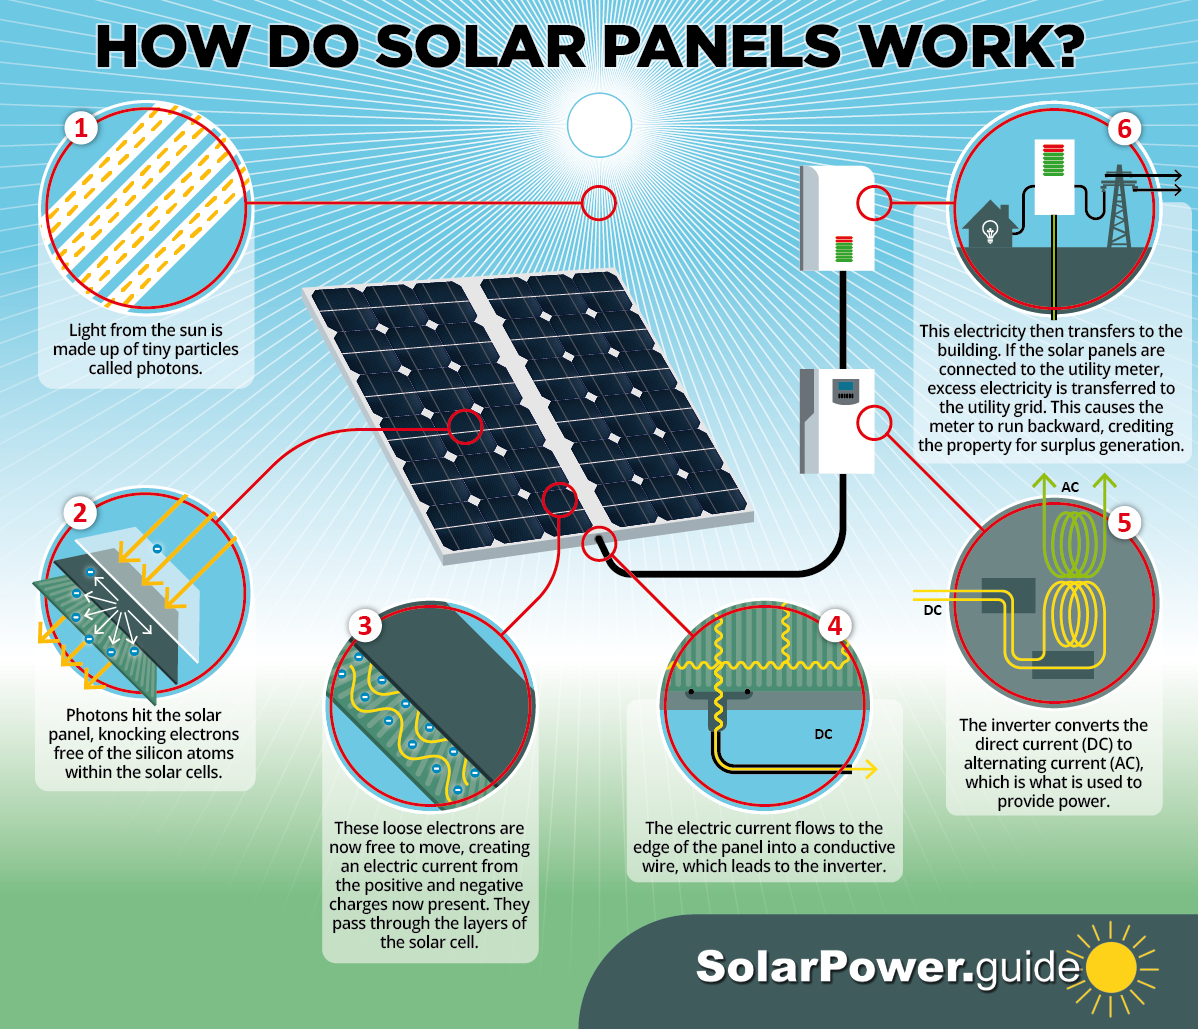

In [ ]:
#@title How Do Solar Panels Work?
# display the image
from IPython.display import Image
display(Image('/content/drive/MyDrive/CS167/Datasets/solar.png'))

# **2. Data Preparation**
**Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?**

- After I decided that I wanted to work on the earlier issue, I decided to look for the available data, I found the image data that I used for the training of my neural networks in Kaggle [Link to source](https://www.kaggle.com/datasets/hemanthsai7/solar-panel-dust-detection). 

- The source showed the data splitted between the two available image classes which are **`Dusty`** and **`Clean`**, I later downloaded the data and performed the split manually. 

- The split is made of 80% for Training Data containing **2037 images** and 20% for Testing Data with **525 images** 

- I have made the splitted data open source and available here [Link to Data Folder](https://drive.google.com/drive/folders/11ehMdSXm5b9f-V-l4ZSLWircqaBcXav_?usp=share_link). 


## **Importing the data**

In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# attempt to get GPU reserved
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import keras
print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.9.2
Keras version: 2.9.0


In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import the libraries
import keras
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
import sys

In [ ]:
# dimensions of our images.
img_width = 200 # Changed the image width from 3915 to 200 to reduce runtime
img_height = 200 # Changed the image height from 2202 to 200 to reduce runtime

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/CS167/Datasets/solar_panel_images/train' #images
test_data_dir = '/content/drive/MyDrive/CS167/Datasets/solar_panel_images/test'   #images

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32

In [ ]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2037 images belonging to 2 classes.
Found 525 images belonging to 2 classes.


# **3. Research**


## **1st Convolutional Neural Network** 

In [ ]:
# Set up 1st CNN here

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32, activation='relu')) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))  

# need to compile the model before you can use it
model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 

### **1st Neural Network Training**

In [ ]:
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
64/64 [==============================] - 95s 1s/step - loss: 0.5389 - accuracy: 0.7315 - val_loss: 0.5222 - val_accuracy: 0.7429
Epoch 2/10
64/64 [==============================] - 88s 1s/step - loss: 0.5384 - accuracy: 0.7349 - val_loss: 0.6001 - val_accuracy: 0.6857
Epoch 3/10
64/64 [==============================] - 86s 1s/step - loss: 0.5125 - accuracy: 0.7526 - val_loss: 0.5209 - val_accuracy: 0.7162
Epoch 4/10
64/64 [==============================] - 87s 1s/step - loss: 0.5035 - accuracy: 0.7482 - val_loss: 0.4710 - val_accuracy: 0.7924
Epoch 5/10
64/64 [==============================] - 88s 1s/step - loss: 0.4931 - accuracy: 0.7712 - val_loss: 0.4469 - val_accuracy: 0.8133
Epoch 6/10
64/64 [==============================] - 86s 1s/step - loss: 0.4675 - accuracy: 0.7889 - val_loss: 0.4438 - val_accuracy: 0.8210
Epoch 7/10
64/64 [==============================] - 87s 1s/step - loss: 0.4632 - accuracy: 0.7879 - val_loss: 0.4896 - val_accuracy: 0.7619
Epoch 8/10
64/64 [==

### **1st Neural Network Training Results**




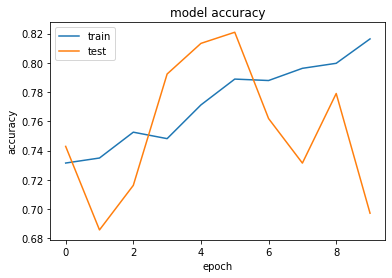

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Dirty Image Testing**




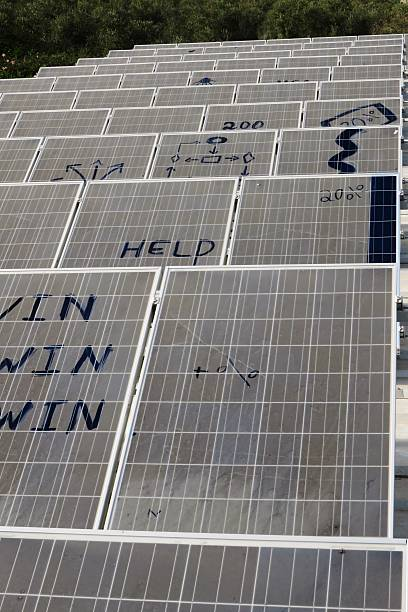

In [ ]:
# display the image
from IPython.display import Image
display(Image('/content/drive/MyDrive/CS167/Datasets/solar_panel_images/test/dusty/Imgdirty_855_1.jpg'))

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
img1 = load_img("/content/drive/MyDrive/CS167/Datasets/solar_panel_images/test/dusty/Imgdirty_855_1.jpg", target_size=(200, 200))

# convert to array
img1 = img_to_array(img1)

# reshape into a single sample with 3 channels
img1 = img1.reshape(1,200,200,3)
img1 = img1.astype('float32')

#convert image from [0,255] to [0,1]
img1 = datagen.standardize(img1)

# predict the class
# Result fo the softmax
result1 = model.predict(img1)
print(result1)

1/1 [==============================] - 0s 223ms/step
[[0.777002]]


In [ ]:
import os
vals = list(result1[0])

classes = os.listdir("./drive/MyDrive/CS167/Datasets/solar_panel_images/test/")
classes.sort()
print(classes[int(vals[0] +.5)])

dusty


## **2nd Convolutional Neural Network**

In [ ]:
# 2nd CNN here

model2 = Sequential()
model2.add(Conv2D(64,(4, 4), activation = 'relu', input_shape=(img_width, img_height, 3)))

model2.add(Conv2D(64,(4,4), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32,(4,4), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32,(4,4), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model2.add(Dense(32, activation='relu')) #fully-connected layer
model2.add(Dense(1,activation='sigmoid'))  

# need to compile the model before you can use it
model2.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 

## **2nd Convolutional Neural Network Training**

In [ ]:
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
64/64 [==============================] - 99s 2s/step - loss: 0.6825 - accuracy: 0.5734 - val_loss: 0.6674 - val_accuracy: 0.5924
Epoch 2/10
64/64 [==============================] - 99s 2s/step - loss: 0.6754 - accuracy: 0.5803 - val_loss: 0.6590 - val_accuracy: 0.5924
Epoch 3/10
64/64 [==============================] - 102s 2s/step - loss: 0.6609 - accuracy: 0.6014 - val_loss: 0.6258 - val_accuracy: 0.5924
Epoch 4/10
64/64 [==============================] - 97s 2s/step - loss: 0.6389 - accuracy: 0.6470 - val_loss: 0.5820 - val_accuracy: 0.7219
Epoch 5/10
64/64 [==============================] - 98s 2s/step - loss: 0.6257 - accuracy: 0.6583 - val_loss: 0.5784 - val_accuracy: 0.7238
Epoch 6/10
64/64 [==============================] - 92s 1s/step - loss: 0.6051 - accuracy: 0.6892 - val_loss: 0.5716 - val_accuracy: 0.6838
Epoch 7/10
64/64 [==============================] - 93s 1s/step - loss: 0.5972 - accuracy: 0.6937 - val_loss: 0.5743 - val_accuracy: 0.6686
Epoch 8/10
64/64 [=

### **2nd Convolutional Neural Network Training Results**

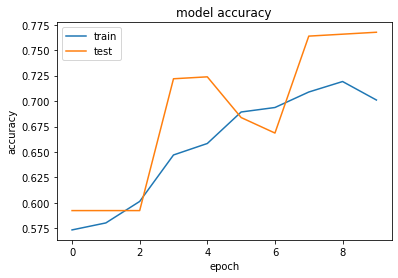

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Clean Image Test**

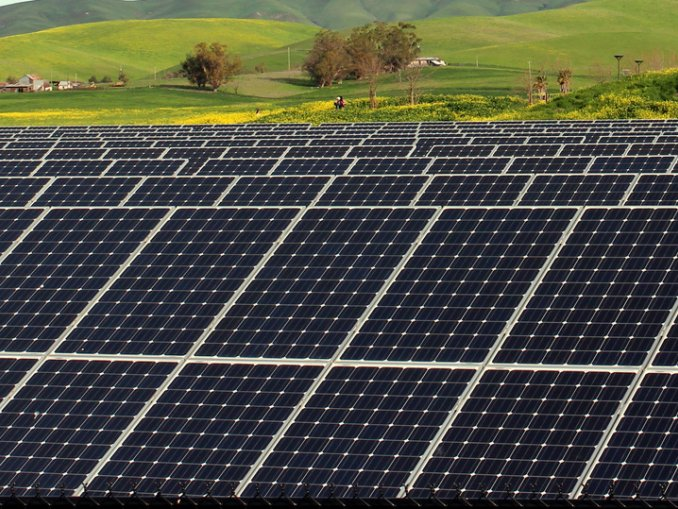

In [ ]:
# display the image
from IPython.display import Image
display(Image('/content/drive/MyDrive/CS167/Datasets/solar_panel_images/test/clean/Imgclean_38_0.jpg'))

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
img2 = load_img("/content/drive/MyDrive/CS167/Datasets/solar_panel_images/test/clean/Imgclean_38_0.jpg", target_size=(200, 200))

# convert to array
img2 = img_to_array(img2)

# reshape into a single sample with 3 channels
img2 = img2.reshape(1,200,200,3)
img2 = img2.astype('float32')

#convert image from [0,255] to [0,1]
img2 = datagen.standardize(img2)

# predict the class
# Result fo the softmax
result2 = model2.predict(img2)
print(result2)

1/1 [==============================] - 0s 357ms/step
[[0.37658268]]


In [ ]:
import os
vals = list(result2[0])

classes = os.listdir("./drive/MyDrive/CS167/Datasets/solar_panel_images/test/")
classes.sort()
print(classes[int(vals[0] +.5)])

clean


## **3rd CNN Here**

In [ ]:
# 3nd CNN here

model3 = Sequential()
model3.add(Conv2D(64,(3, 3), activation = 'relu', kernel_regularizer=l2(0.0005),input_shape=(img_width, img_height, 3)))

model3.add(Conv2D(64,(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(32,(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(32,(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model3.add(Dense(32, activation='relu')) #fully-connected layer
model3.add(Dense(1,activation='sigmoid'))  

# need to compile the model before you can use it
model3.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 

In [ ]:
training_results3 = model3.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
64/64 [==============================] - 97s 1s/step - loss: 0.6840 - accuracy: 0.5778 - val_loss: 0.6748 - val_accuracy: 0.5924
Epoch 2/10
64/64 [==============================] - 91s 1s/step - loss: 0.6801 - accuracy: 0.5803 - val_loss: 0.6643 - val_accuracy: 0.5924
Epoch 3/10
64/64 [==============================] - 97s 2s/step - loss: 0.6731 - accuracy: 0.5808 - val_loss: 0.6574 - val_accuracy: 0.5924
Epoch 4/10
64/64 [==============================] - 94s 1s/step - loss: 0.6638 - accuracy: 0.5999 - val_loss: 0.6279 - val_accuracy: 0.6152
Epoch 5/10
64/64 [==============================] - 96s 2s/step - loss: 0.6452 - accuracy: 0.6480 - val_loss: 0.5939 - val_accuracy: 0.7695
Epoch 6/10
64/64 [==============================] - 92s 1s/step - loss: 0.6293 - accuracy: 0.6657 - val_loss: 0.5668 - val_accuracy: 0.7410
Epoch 7/10
64/64 [==============================] - 93s 1s/step - loss: 0.6102 - accuracy: 0.6804 - val_loss: 0.5512 - val_accuracy: 0.7524
Epoch 8/10
64/64 [==

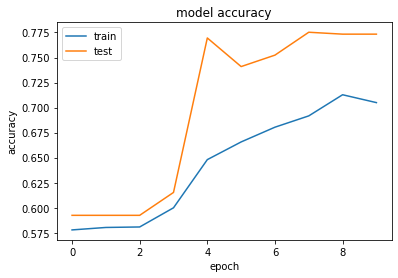

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results3.history['accuracy'])
plt.plot(training_results3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

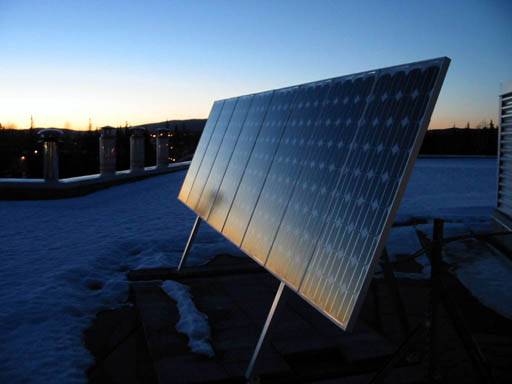

In [ ]:
# display the image
from IPython.display import Image
display(Image('/content/drive/MyDrive/CS167/Datasets/solar_panel_images/test/clean/Imgclean_175_0.jpg'))

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
img3 = load_img("/content/drive/MyDrive/CS167/Datasets/solar_panel_images/test/clean/Imgclean_175_0.jpg", target_size=(200, 200))

# convert to array
img3 = img_to_array(img3)

# reshape into a single sample with 3 channels
img3 = img3.reshape(1,200,200,3)
img3 = img3.astype('float32')

#convert image from [0,255] to [0,1]
img3 = datagen.standardize(img3)

# predict the class
# Result fo the softmax
result3 = model3.predict(img3)
print(result3)

1/1 [==============================] - 0s 297ms/step
[[0.2017786]]


In [ ]:
import os
vals = list(result3[0])

classes = os.listdir("./drive/MyDrive/CS167/Datasets/solar_panel_images/test/")
classes.sort()
print('This image was a class "clean" and it predicted:',classes[int(vals[0] +.5)])

#**4. Analysis**

**What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.**

I found out that probably reducing the images not so much like to 200 which was what I had might have make it better in terms of accuracy, but I am looking forward to test that out of this project. The best model for me was the 3rd CNN in which I played more with the parameters and reached a greater accuracy better, I actually inserted the kernel_regularizer parameter a played a bit until I got the best results. In other terms, the models where very identical and had the same structure. 

# **5. Bumps in the Road**
**What challenges did you encounter? How did you overcome these challenges?**

I had the issue as mention before of data preparation where the data came in two big folders with just the type of class the where from and I had to manually split them by percentage. I also did not reach the best accuracy results as I was aiming for at least 80-85% which I am sure I can reach as long as I add more height and width.